# **Creazione di un Grafo dai Confini tra Paesi (Wikipedia)**
In questo notebook, estrarremo i dati dalla pagina Wikipedia sui confini dei paesi e costruiremo un **grafo non orientato** in cui i nodi rappresentano i paesi e gli archi rappresentano i confini condivisi.

In [24]:
!pip install lxml requests beautifulsoup4 pandas networkx matplotlib

Colonne trovate: MultiIndex([(                                                                                         'Country or territory (Territories without full sovereignty in italics) [a]', ...),
            (                                                                                                                                       'Total length of land borders', ...),
            (                                                                                                                                       'Total length of land borders', ...),
            (                                                                                                                                       'No. of distinct land borders', ...),
            (                                                                                                                                    'No. of distinct land neighbours', ...),
            ('Land border neighbours and border lengt

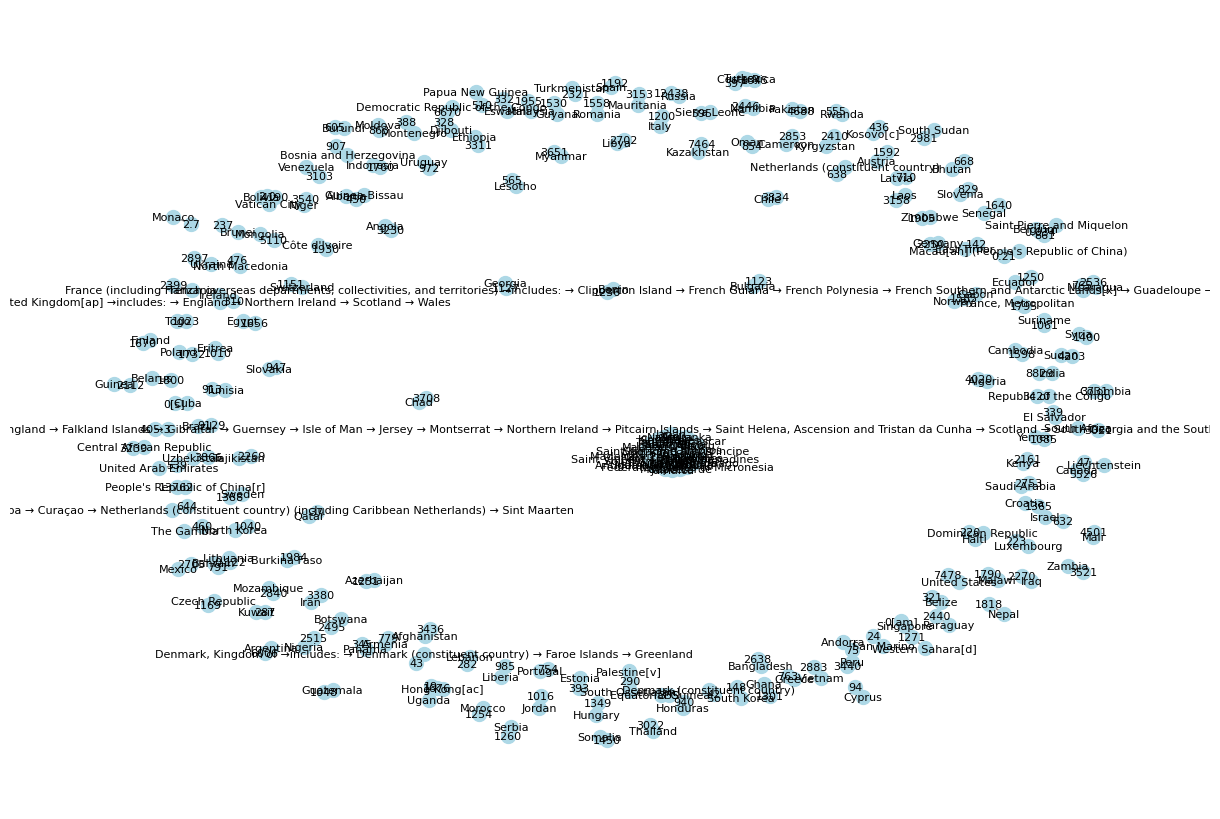

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
import requests
from io import StringIO

# URL della pagina Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_countries_and_territories_by_number_of_land_borders"

# Estrarre il contenuto della pagina
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Troviamo la tabella nella pagina
table = soup.find("table", {"class": "wikitable"})

# Convertiamo la tabella in un DataFrame Pandas utilizzando StringIO
df = pd.read_html(StringIO(str(table)))[0]

# Verifica delle colonne
print("Colonne trovate:", df.columns)

# Selezioniamo solo Nome del Paese e Paesi Confinanti
df = df.iloc[:, [0, 2]]
df.columns = ["Country", "Borders"]

# Rimuoviamo righe con dati mancanti
df.dropna(inplace=True)

# Creazione del grafo
G = nx.Graph()

# Aggiunta delle connessioni tra paesi
for _, row in df.iterrows():
    country = row["Country"]
    neighbors = row["Borders"].split(", ")
    for neighbor in neighbors:
        G.add_edge(country, neighbor)  # Creiamo un arco tra il paese e i suoi vicini

# Disegno del grafo
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=100, font_size=8, edge_color="gray", node_color="lightblue")
plt.show()


#### **Grafici con Gephi** 
[Gephi](https://gephi.org) è “una piattaforma interattiva di visualizzazione ed esplorazione per ogni genere di rete e sistema complesso”. 

Alcuni lo chiamano “il Paintbrush dell’analisi dei dati di rete”. 
Anche se networkx offre il supporto per la visualizzazione dei grafi (tramite matplotlib, di cui parleremo nell’Unità 41, Tracciamento di grafici con PyPlot), 
Gephi si distingue per la sua versatilità e per il suo feedback istantaneo.

## **4. Analisi del Grafo**

### **4.1. Numero Totale di Nodi e Archi**

In [29]:

print(f"Numero di paesi nel grafo: {G.number_of_nodes()}")
print(f"Numero di confini nel grafo: {G.number_of_edges()}")
    

Numero di paesi nel grafo: 373
Numero di confini nel grafo: 207


### **4.2. Paese con Più Confini**

In [30]:

max_degree_country = max(G.degree, key=lambda x: x[1])
print(f"Il paese con più confini è {max_degree_country[0]} con {max_degree_country[1]} confini.")
    

Il paese con più confini è 0 con 37 confini.


### **4.3. Percorso più Breve tra Due Paesi**

Lista completa dei nodi nel grafo:
['Afghanistan', '3436', 'Albania', '450', 'Algeria', '4020', 'Andorra', '75', 'Angola', '3230', 'Antigua and Barbuda', '0', 'Argentina', '6006', 'Armenia', '779', 'Australia', 'Austria', '1592', 'Azerbaijan', '1251', 'Bahamas', 'Bahrain', '0.122', 'Bangladesh', '2638', 'Barbados', 'Belarus', '1800', 'Belgium', '861', 'Belize', '321', 'Benin', '1236', 'Bhutan', '668', 'Bolivia', '4190', 'Bosnia and Herzegovina', '907', 'Botswana', '2495', 'Brazil', '9129', 'Brunei', '237', 'Bulgaria', '1123', 'Burkina Faso', '1984', 'Burundi', '605', 'Cambodia', '1598', 'Cameroon', '2853', 'Canada', '5526', 'Cape Verde', 'Central African Republic', '3239', 'Chad', '3708', 'Chile', '3834', "People's Republic of China[r]", '13762', 'Colombia', '3731', 'Comoros', 'Democratic Republic of the Congo', '6670', 'Republic of the Congo', '3420', 'Costa Rica', '397', "Côte d'Ivoire", '1930', 'Croatia', '1365', 'Cuba', '0[s]', 'Cyprus', '94', 'Czech Republic', '1169', 'Denmark (co

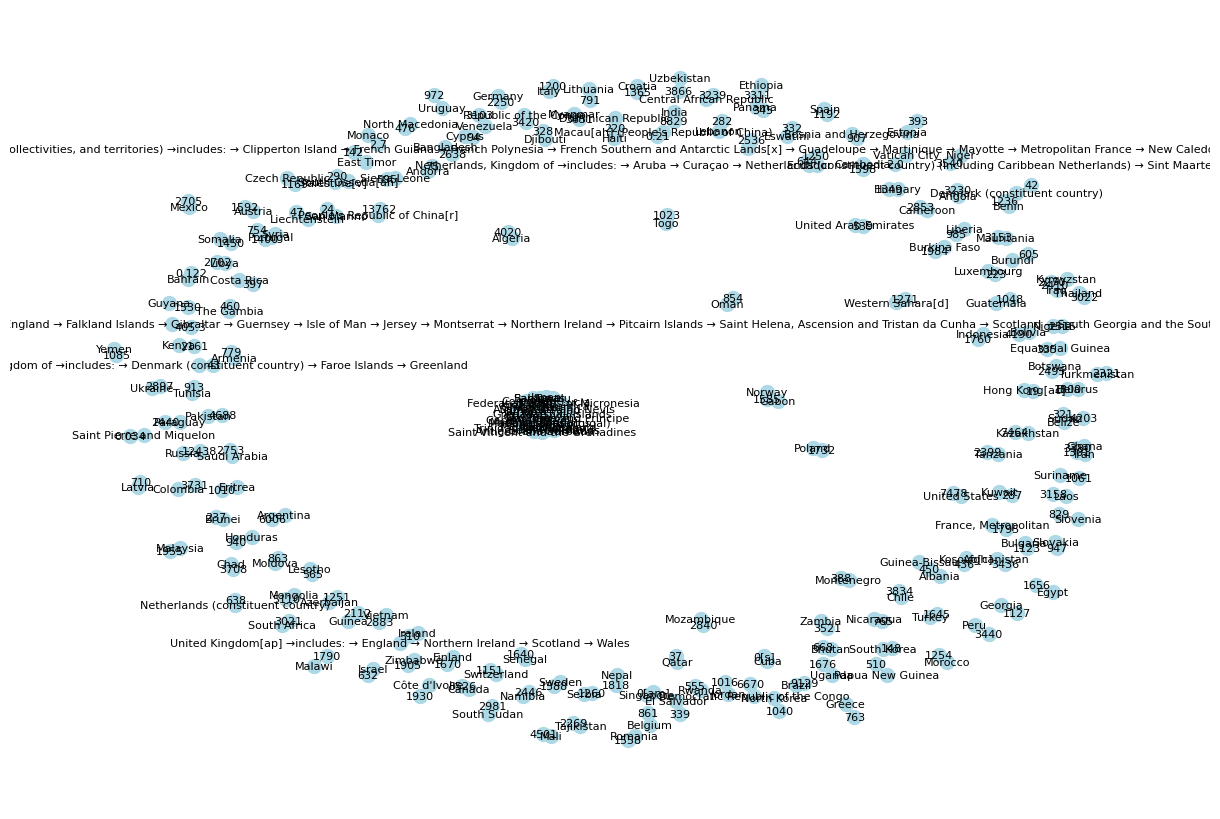

In [49]:

import difflib

# Funzione per trovare il nome più simile a quello cercato
def trova_nome_simile(nome, nodi):
    for node in nodi:
        if nome in node:
            print(node)
    return difflib.get_close_matches(nome, nodi, n=1, cutoff=0.5)

def print_all_nodes():
    print("Lista completa dei nodi nel grafo:")
    print(list(G.nodes))

print_all_nodes()

# Troviamo i nomi più simili nel grafo
france_node = trova_nome_simile("France", G.nodes)
germany_node = trova_nome_simile("Germany", G.nodes)

print("Nome trovato per Francia:", france_node)
print("Nome trovato per Germania:", germany_node)

# Calcoliamo il percorso solo se entrambi i nomi sono stati trovati
if france_node and germany_node and nx.has_path(G, france_node[0], germany_node[0]):
    shortest_path = nx.shortest_path(G, source=france_node[0], target=germany_node[0])
    print(f"Percorso più breve: {shortest_path}")
else:
    print("Uno dei paesi non è stato trovato o non è connesso.")

plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=100, font_size=8, edge_color="gray", node_color="lightblue")
plt.show()

    

## **5. Conclusione**
Abbiamo creato un **grafo geografico** basato sui confini dei paesi, estratto dalla pagina Wikipedia. Questo ci permette di analizzare relazioni geopolitiche e di connettività tra le nazioni.

**Applicazioni possibili**:
- Simulazione di percorsi ottimali tra paesi.
- Analisi di regioni altamente connesse.
- Identificazione di paesi chiave nelle reti geografiche.

Questa tecnica può essere estesa a molte altre reti reali! 🚀